#**IMPORT PYTHON PACKAGES**

In [ ]:
#IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [ ]:
#PACKAGE UNTUK CONNECT G-DRIVE N G-COLLAB 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LOAD DATASET
dataset_customers = pd.read_csv('/content/drive/MyDrive/Dataset/customers_dataset.csv')
dataset_geolocation = pd.read_csv('/content/drive/MyDrive/Dataset/geolocation_dataset.csv')
dataset_items = pd.read_csv('/content/drive/MyDrive/Dataset/order_items_dataset.csv')
dataset_payments = pd.read_csv('/content/drive/MyDrive/Dataset/order_payments_dataset.csv')
dataset_reviews = pd.read_csv('/content/drive/MyDrive/Dataset/order_reviews_dataset.csv')
dataset_orders = pd.read_csv('/content/drive/MyDrive/Dataset/orders_dataset.csv')
dataset_product_category = pd.read_csv('/content/drive/MyDrive/Dataset/product_category_name_translation.csv')
dataset_product = pd.read_csv('/content/drive/MyDrive/Dataset/products_dataset.csv')
dataset_seller = pd.read_csv('/content/drive/MyDrive/Dataset/sellers_dataset.csv')

#combine all the dataset_combine
dataset_combine = [dataset_customers, dataset_geolocation, dataset_items, dataset_payments, dataset_reviews, dataset_orders, dataset_product_category, dataset_product, dataset_seller  ]
for i in dataset_combine:
    i.dropna(inplace=False)

dataset_combine

desc_dataset = pd.DataFrame({},)
desc_dataset['columns'] = [', '.join([col for col in data.columns ]) for data in dataset_combine]
desc_dataset['row']= [data.shape[0] for data in dataset_combine]
desc_dataset['coloumns']= [data.shape[1] for data in dataset_combine]
desc_dataset['data_duplicate']= [data.duplicated().sum() for data in dataset_combine]
desc_dataset['data_null']= [data.isnull().sum().sum() for data in dataset_combine]
desc_dataset['null'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in dataset_combine]
desc_dataset.style.background_gradient(cmap='inferno')

,columns,row,coloumns,data_duplicate,data_null,null
0,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,"product_category_name, product_category_name_english",71,2,0,0,
7,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
8,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,


In [ ]:
#MERGE DATASET
df = pd.merge(dataset_customers,dataset_orders, on="customer_id")
df = df.merge(dataset_payments, on ="order_id")
df = df.merge(dataset_reviews, on="order_id")
df = df.merge(dataset_items, on="order_id")
df = df.merge(dataset_product, on="product_id")
df = df.merge(dataset_seller, on="seller_id")
df = df.merge(dataset_product_category, on="product_category_name")
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,176.0,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11574,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11575,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach
11576,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,275.0,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach


# **INTERNAL KNOWLEDGE**
*   There are 1510 sellers from 375 city
*   Total 6011 products with 66  categories
*   Total 99333 customers from 1578 cities
*   Item daftar







In [ ]:
df.nunique()

customer_id                      9436
customer_unique_id               9333
customer_zip_code_prefix         5837
customer_city                    1578
customer_state                     27
order_id                         9436
order_status                        1
order_purchase_timestamp         9415
order_approved_at                8986
order_delivered_carrier_date     7545
order_delivered_customer_date    9402
order_estimated_delivery_date     153
payment_sequential                 12
payment_type                        4
payment_installments               19
payment_value                    6777
review_id                        9428
review_score                        5
review_comment_title             3950
review_comment_message           8671
review_creation_date              166
review_answer_timestamp          9422
order_item_id                      13
product_id                       6011
seller_id                        1510
shipping_limit_date              9349
price       

In [ ]:
#Create Coloumn Total Price (Price + freight value)
df['Total_Price'] = df['price']+df['freight_value']
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,Total_Price
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort,252.25
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP,home_confort,278.66
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort,95.57
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort,98.68
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,1.0,1825.0,53.0,10.0,40.0,14940,ibitinga,SP,home_confort,101.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach,19.13
11574,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach,19.13
11575,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach,19.13
11576,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,2.0,150.0,26.0,5.0,18.0,5126,sao paulo,SP,fashion_underwear_beach,19.13


# **Analyze**


In [ ]:
#SUmmmary Statistic for the numerical coloumn
df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,Total_Price
count,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.00000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000
mean,33922.288996,1.057091,3.061582,198.008334,3.794179,1.25013,130.889616,21.994643,49.283641,815.354465,2.209363,2120.935222,28.980912,16.566937,22.485922,23388.328900,152.884259
std,29031.060991,0.379266,2.840846,303.149627,1.564775,0.77757,210.511516,18.720550,9.741598,646.220657,1.698805,3759.594294,15.313693,13.191465,11.021578,26935.545826,218.942038
min,1003.000000,1.000000,1.000000,0.050000,1.000000,1.00000,0.850000,0.000000,8.000000,4.000000,1.000000,0.000000,11.000000,2.000000,7.000000,1001.000000,10.580000
25%,11021.250000,1.000000,1.000000,67.700000,3.000000,1.00000,40.800000,12.912500,43.000000,366.000000,1.000000,292.000000,18.000000,8.000000,15.000000,5849.000000,57.230000
50%,23520.000000,1.000000,2.000000,122.800000,5.000000,1.00000,79.000000,18.230000,52.000000,634.000000,1.000000,650.000000,23.000000,13.000000,20.000000,13405.000000,98.040000
75%,55608.000000,1.000000,4.000000,209.910000,5.000000,1.00000,139.000000,23.350000,57.000000,1031.000000,3.000000,1800.000000,35.000000,20.000000,29.000000,24451.000000,164.630000
max,99980.000000,12.000000,20.000000,7274.880000,5.000000,13.00000,4590.000000,375.280000,64.000000,3985.000000,17.000000,30000.000000,105.000000,105.000000,105.000000,99730.000000,4681.780000


# TOP 10 Product Category

<AxesSubplot:xlabel='order_item_id', ylabel='product_category_name_english'>

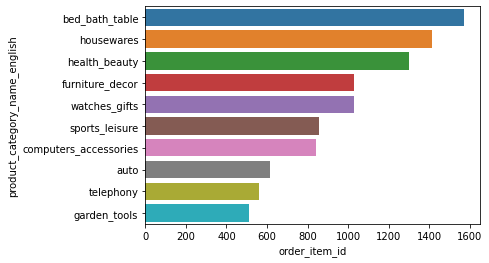

In [ ]:
# TOP 10 Product Category
df_product_category = df[['product_category_name_english', 'order_item_id', 'product_id']]
df_product_category = df_product_category.groupby('product_category_name_english').sum()

#sort from the largest order item
df_product_category = df_product_category.sort_values("order_item_id", ascending=False)
df_product_category

#Data vizualization order_item
sns.barplot(x='order_item_id', y='product_category_name_english', data=df_product_category.reset_index().head(10), orient='h')

# TOP 10 CUSTOMERS

<AxesSubplot:xlabel='order_item_id', ylabel='customer_id'>

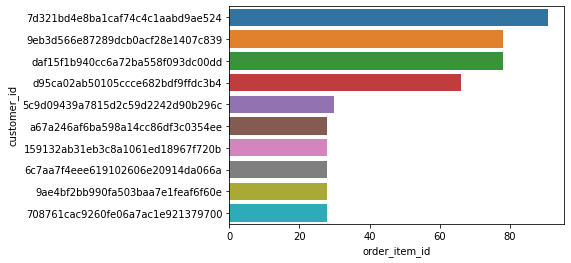

In [ ]:
# TOP 10 Product Category
df_customers= df[['customer_id', 'order_item_id']]
df_customers= df_customers.groupby('customer_id').sum()

#sort from the largest order item
df_customers= df_customers.sort_values("order_item_id", ascending=False)

#Data vizualization order_item
sns.barplot(x='order_item_id', y='customer_id', data=df_customers.reset_index().head(10), orient='h')

#Top 10 Seller Sold Items (Base on ID)

<AxesSubplot:xlabel='order_item_id', ylabel='seller_id'>

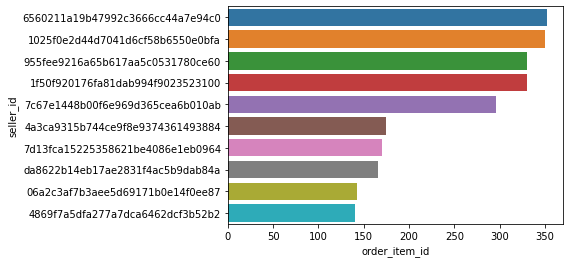

In [ ]:
#Create df contain only seller_id,price and item
df_seller_id = df[['seller_id', 'order_item_id', 'price']]
df_seller_id = df_seller_id.groupby('seller_id').sum()

#sort from the largest order item
df_seller_id = df_seller_id.sort_values("order_item_id", ascending=False)
df_seller_id

#Data vizualization order_item
sns.barplot(x='order_item_id', y='seller_id', data=df_seller_id.reset_index().head(10), orient='h')

#Order Item By state 
RANK 1 : Sao Paulo

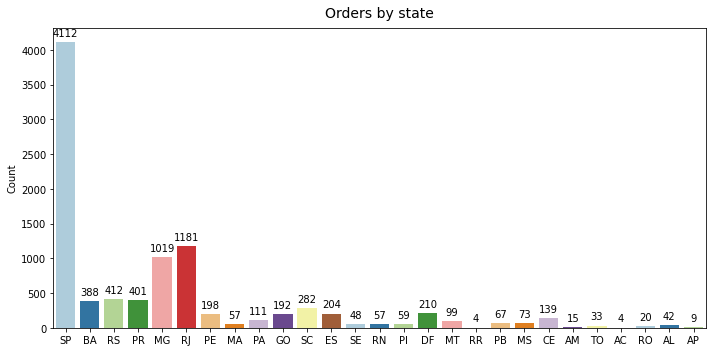

In [ ]:
# Deleting duplicate order_id in a new df_state_orderframe (copy of df)
df_state_order = df.copy(deep = True)
df_state_order.drop_duplicates(subset = ["order_id"], inplace = True)


# Creating a plot to show number of orders by state
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, x = df_state_order['customer_state'], palette = 'Paired').set(xlabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Orders by state', fontdict = {'fontsize': 14}, pad = 10.5)
plt.ylabel('Count')

plt.tight_layout()

# Order per Day
Monday is the most pupular day for shopping

Text(0.5, 1.0, 'Order per Days')

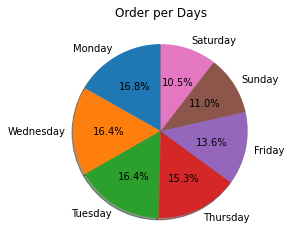

In [ ]:
#Order per Days
df['order_purchase_timestamp'] =  pd.to_datetime(df['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')

order_days = (df['order_purchase_timestamp'].apply(lambda x: x.strftime('%A')).value_counts())
plt.pie(
    order_days,
    labels=order_days.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Order per Days')

# WORD CLOUD RATING 1 REVIEW

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


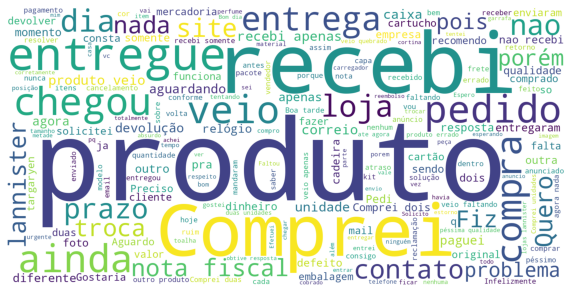

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
#Create data contain rating 1
worst_rating = df[df['review_score'] == 1]['review_comment_message'].dropna()
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stop_words,background_color="white",width=1700, height=850).generate(' '.join(worst_rating))

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

# WORD CLOUD RATING 5 REVIEW

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


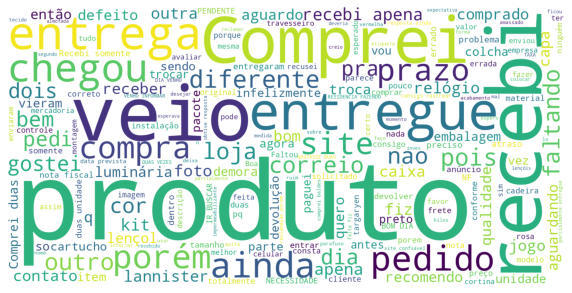

In [ ]:
best_rating = df[df['review_score'] == 2]['review_comment_message'].dropna()
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stop_words,background_color="white",width=1700, height=850).generate(' '.join(best_rating))

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

# Items Order By Payment Type 

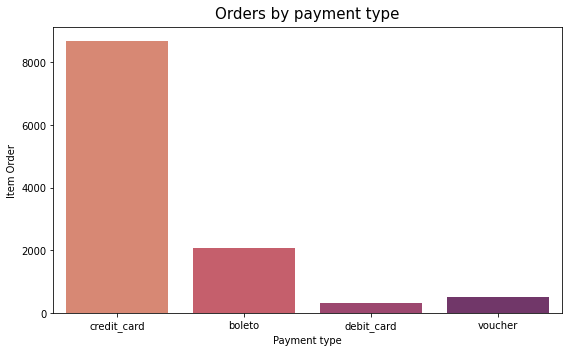

In [ ]:
#Vizualization of Items order by payment type
plt.figure(figsize = (8, 5))

sns.countplot(x = 'payment_type', data = df, palette = 'flare')
plt.title('Orders by payment type', fontdict = {'fontsize': 15}, pad = 9)
plt.xlabel('Payment type')
plt.ylabel('Item Order')

plt.tight_layout()

In [ ]:
import plotly.express as px
px.pie(df.groupby('payment_type', as_index = False).size().rename(columns = {'payment_type': 'Payment Type', 'size': 'Number of Orders'}),
        values='Number of Orders',
        names='Payment Type',
        title='Payment Types'
)

# Ratings Percentage (Scale 1-5)

Text(0.5, 1.0, 'Ratings')

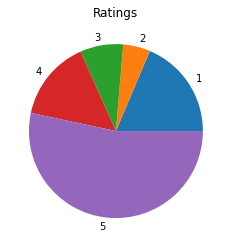

In [ ]:
#Visualization of review
df.groupby('review_score').size().plot(kind = 'pie')
plt.xlabel('')
plt.ylabel('')
plt.title('Ratings')

# PAYMENT VALUE OVER TIME

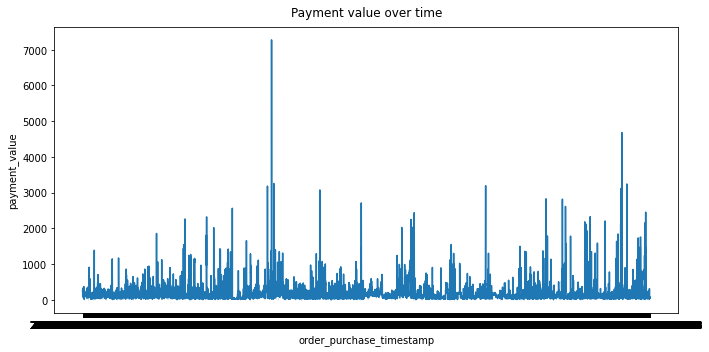

In [ ]:
#Creating a plot to show payment value over time
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.lineplot(x = df['order_purchase_timestamp'], y = df['payment_value'], palette = 'viridis')
plt.title('Payment value over time', fontdict = {'fontsize': 12}, pad = 10.5)

plt.tight_layout()